## A Simple Tutorial For using QCAD

In [1]:
from QCAD import Module, QuantumCircuit, execute
from QCAD import TypicalModule as tm

import numpy as np

### 1. Definition of Module
- 이미 정의된 Module을 아래 나열하였습니다. </br> TypicalModule Class를 이용해 사용하시면 됩니다.

- tm.I, tm.H, tm.X, tm.Y, tm.Z, tm.CX, tm.CZ, tm.CCX, tm.CCZ, tm.RX, tm.RY, tm.RZ, tm.U, tm.MCU

- 이미 정의된 모듈을 재사용하여 새로운 모듈을 정의할 수 있습니다. </br> 이때 모듈의 PORT 순서를 변경할 수 있습니다.

In [2]:
rx_half_pi = tm.RX('RXPI/2', np.pi/2)

custom_u = tm.U('CUSTOMU', 1, [[-1, 0], [0, 1]])

multi_control_h = tm.MCU('CCH', 3, [0, 1], tm.H[2])

In [3]:
SWAP = Module('SWAP', 2, [tm.CX[0, 1],
                         tm.CX[1, 0],
                         tm.CX[0, 1]])

In [4]:
# Controlled Gates

CH = tm.MCU('CH', 2, [0], tm.H[1])
CS = tm.MCU('CS', 2, [0], tm.S[1])
CT = tm.MCU('CT', 2, [0], tm.T[1])

# Module Fourier3

F3 = Module('F3', 3, [tm.H[0],
                      CS[1, 0],
                      CT[2, 0],
                      tm.H[1],
                      CS[2, 1],
                      tm.H[2],
                      SWAP[0, 2]])

In [5]:
# Module Quantum Circuit

CSWAP = tm.MCU('CSWAP', 3, [0], SWAP[1, 2])

QC = Module('QC', 5, [F3[0, 2, 4],
                      CSWAP[4, 0, 2],
                      tm.MCU('MCF3', 5, [0, 1], F3[2, 3, 4])[0, 1, 2, 3, 4]])

In [6]:
QC.show()

# Module Decomposition

for _temp_module, _temp_reg_index in zip(*QC.typ_decompose()):
    print('-'*80)
    _temp_module.show()
    print(f'reg_index     :{_temp_reg_index}')

Name        :QC
N           :5
sub_modules :[<QCAD.module.Module object at 0x7f89a4789710>, <QCAD.module.TypicalModule.MCU object at 0x7f89cc71c4e0>, <QCAD.module.TypicalModule.MCU object at 0x7f89cc71c240>]
reg_indices :[[0, 2, 4], [4, 0, 2], [0, 1, 2, 3, 4]]
typical     :False
contolled   :False
--------------------------------------------------------------------------------
Name        :H
N           :1
sub_modules :[]
reg_indices :[]
typical     :True
contolled   :False
reg_index     :[0]
--------------------------------------------------------------------------------
Name        :CS
N           :2
sub_modules :[<QCAD.module.Module object at 0x7f89cc0f1c88>]
reg_indices :[[1]]
typical     :True
contolled   :True
control_bits  :[0]
reg_index     :[2, 0]
--------------------------------------------------------------------------------
Name        :CT
N           :2
sub_modules :[<QCAD.module.Module object at 0x7f89cc729cf8>]
reg_indices :[[1]]
typical     :True
contolled   :True
contr

### 2. Quantum Circuit Description using Modules

Quantum Circuit은 사실상 하나의 큰 모듈과 같습니다. </br> 모듈을 정의한 뒤 이를 이용해 QC를 생성합니다.

In [7]:
qc = QuantumCircuit(QC)

### 3. Simulation of Quantum Circuit with arbitrary initial state

[[(0.35355339059327384+0j), (0.35355339059327384+0j), 0j, 0j, (0.35355339059327384+0j), (0.35355339059327384+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, (0.35355339059327384+0j), (0.35355339059327384+0j), 0j, 0j, (0.35355339059327384+0j), (0.35355339059327384+0j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]]


TypeError: only size-1 arrays can be converted to Python scalars

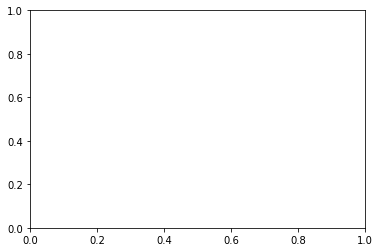

In [8]:
execute('MatrixModel', qc)
# execute('MatrixModel', qc, [[1, 0], [1/np.sqrt(2), 1/np.sqrt(2)], [1, 0], [1, 0], [1, 0]])
# execute('MatrixModel', qc, [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])